# Задание

### Основная часть

* Проанализируйте и опишите данный датасет, используя все возможные графики из тех, что были на уроке Matplotlib, Seaborn, Plotly
* Используйте также описательные статистики
* У каждого построенного графика должен быть соответствующий вывод, который описывает наблюдение или инсайт

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [177]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [35]:
# !pip install plotly
import plotly.express as px

In [179]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [30]:
df.groupby('city_type').count()

,age,gender,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
city_type,,,,,,,,,,,,,,,,,,,,,
100-500,10660,10660,10660,10660,10660,10660,10660,10660,10660,10660,...,10660,10660,10660,10660,10660,10660,801,7024,6876,10258
1M+,7847,7847,7847,7847,7847,7847,7847,7847,7847,7847,...,7847,7847,7847,7847,7847,7847,525,5208,5128,7440
500-1000,6926,6926,6926,6926,6926,6926,6926,6926,6926,6926,...,6926,6926,6926,6926,6926,6926,463,4700,4621,6541
<100,15211,15211,15211,15211,15211,15211,15211,15211,15211,15211,...,15211,15211,15211,15211,15211,15211,767,9885,9665,14457
Mega,8633,8633,8633,8633,8633,8633,8633,8633,8633,8633,...,8633,8633,8633,8633,8633,8633,1235,4740,4658,8214


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49277 entries, 5 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  49277 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            49277 non-null  object 
 3   full_mob             49277 non-null  int64  
 4   ml_balance           49277 non-null  float64
 5   cl_balance_0m        49277 non-null  float64
 6   loan_balance_0m      49277 non-null  float64
 7   td_balance_0m        49277 non-null  float64
 8   casa_balance_0m      49277 non-null  float64
 9   dc_trx_cnt           49277 non-null  int64  
 10  dc_trx_sum           49277 non-null  float64
 11  income               49277 non-null  float64
 12  min_casa_balance_1q  49277 non-null  float64
 13  max_casa_balance_1q  49277 non-null  float64
 14  avg_casa_balance_1Y  49277 non-null  float64
 15  min_td_balance_1q    49277 non-null 

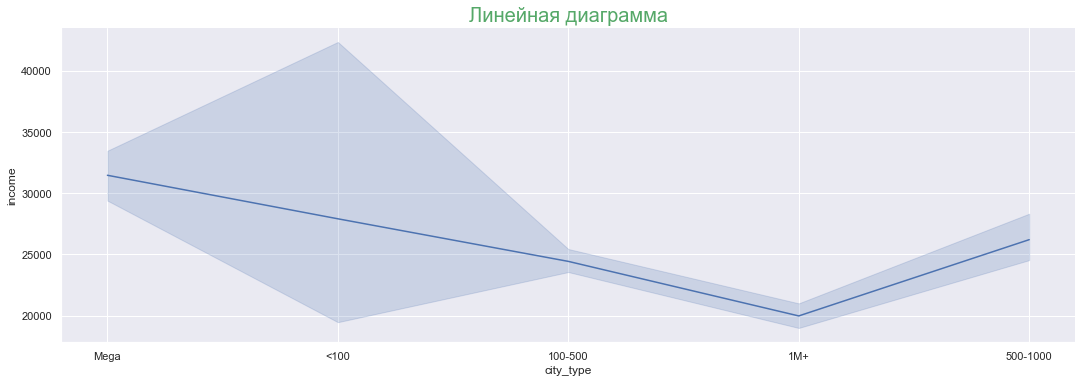

In [5]:
sns.set(style='darkgrid')  

sns.relplot(
    x='city_type', 
    y='income', 
    data=df.query("age < 70"), 
    kind='line',
    aspect=3
)
plt.title('Линейная диаграмма', size=20, color='g');

In [181]:
df = df[df['gender'].notna()]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49277 entries, 5 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  49277 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            49277 non-null  object 
 3   full_mob             49277 non-null  int64  
 4   ml_balance           49277 non-null  float64
 5   cl_balance_0m        49277 non-null  float64
 6   loan_balance_0m      49277 non-null  float64
 7   td_balance_0m        49277 non-null  float64
 8   casa_balance_0m      49277 non-null  float64
 9   dc_trx_cnt           49277 non-null  int64  
 10  dc_trx_sum           49277 non-null  float64
 11  income               49277 non-null  float64
 12  min_casa_balance_1q  49277 non-null  float64
 13  max_casa_balance_1q  49277 non-null  float64
 14  avg_casa_balance_1Y  49277 non-null  float64
 15  min_td_balance_1q    49277 non-null 

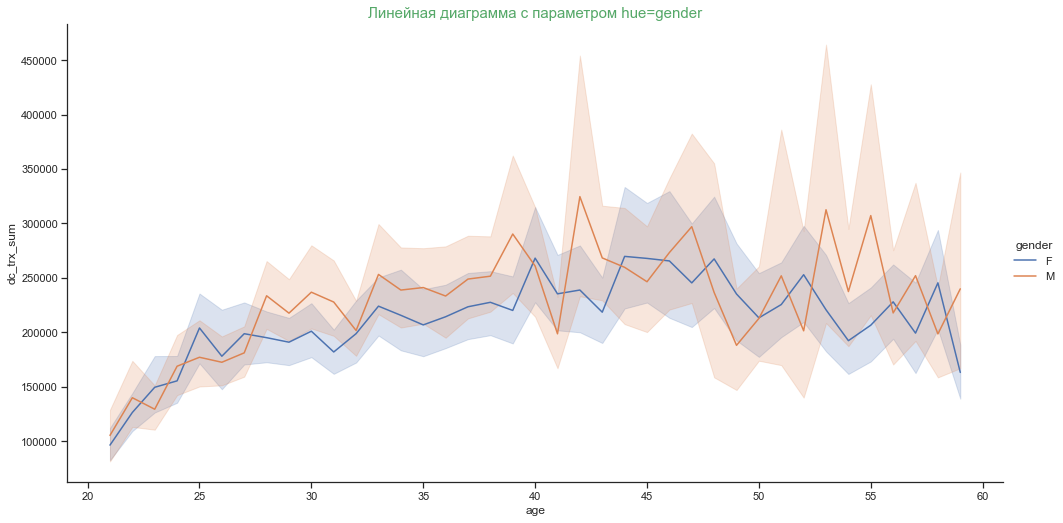

In [147]:
sns.relplot(x='age',
            y='dc_trx_sum',
            hue='gender',
            hue_order=["F", "М"],
            data=df.query("age > 20 and age < 60"),
            aspect=2,
            height=7,
            kind='line')
plt.title('Линейная диаграмма c параметром hue=gender', size=15, color='g');

In [ ]:
Вывод: бОльшая сумма трат по картам совершается клиентами в возрасте от 39 и до 48 лет. 
    В период с 20 до 39 сумма возрастает, после 50 уеньшается. У женщин выбросов меньше, чем у мужчин.

In [174]:
pd.crosstab(df['gender'], df['city_type'], margins=True)

city_type,100-500,1M+,500-1000,<100,Mega,All
gender,,,,,,
F,5291,4063,3297,7048,4175,23874
М,5369,3784,3629,8163,4458,25403
All,10660,7847,6926,15211,8633,49277


<AxesSubplot:ylabel='None'>

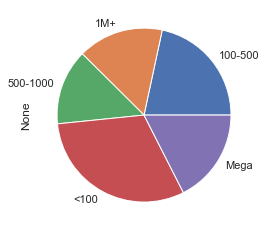

In [172]:
pd.crosstab(df['gender'], df['city_type']).sum().plot(kind='pie', y='sum')

<AxesSubplot:ylabel='None'>

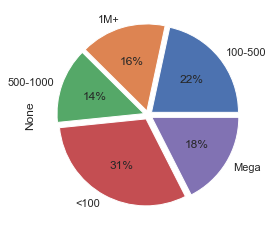

In [173]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
pd.crosstab(df['gender'], df['city_type']).sum().plot(kind='pie', y='all', autopct='%1.0f%%', explode=explode)

In [ ]:
Вывод: клиентов из городов с меньшей численностью больше.

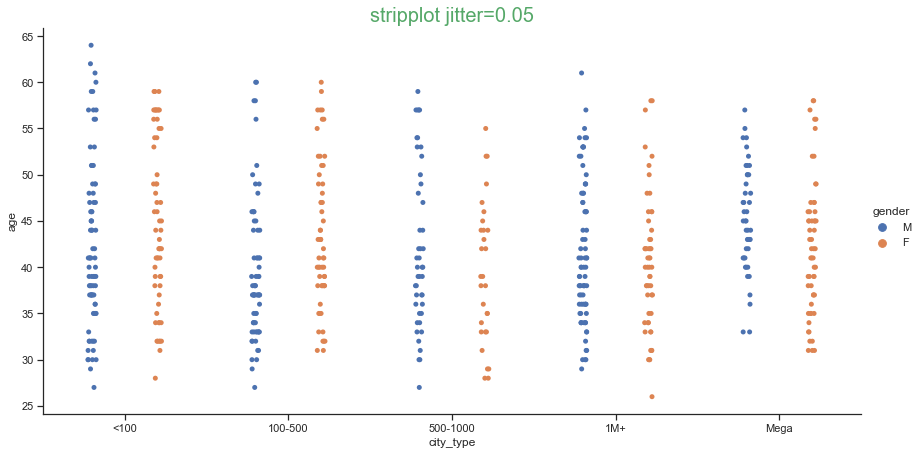

In [114]:
sns.set(style="ticks", color_codes=True)

city = ['<100', '100-500', '500-1000', '1M+', 'Mega']
sns.catplot(
    x='city_type',
    y='age', 
    data=df.query("ml_balance != 0.0"), 
    hue='gender',    # оба на одном графике разными цветами
    order=city, 
    jitter=0.05,
    height=6, 
    aspect=2, 
    kind='strip', 
    dodge=True)
# Можно использовать dodge=True чтобы не накладывать показатели друг на друга, а выстроить рядом друг с другом
plt.title('ипотека', size=20, color='g');

Вывод: в Mega городах ипотеку берут в полее позднем возрасте.

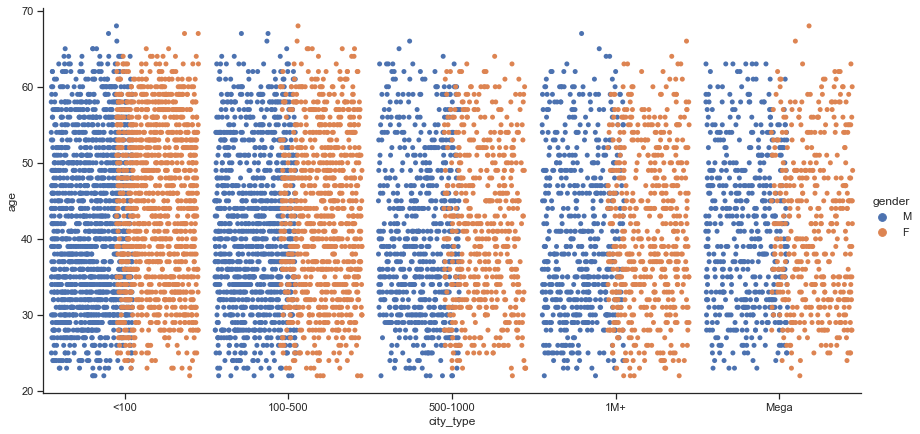

In [137]:
sns.set(style="ticks", color_codes=True)

city = ['<100', '100-500', '500-1000', '1M+', 'Mega']
sns.catplot(
    x='city_type',
    y='age', 
    data=df.query("cl_balance_0m != 0.0"), 
    hue='gender',    # оба на одном графике разными цветами
    order=city, 
    jitter=0.5,
    height=6, 
    aspect=2, 
    kind='strip', 
    dodge=True)
# Можно использовать dodge=True чтобы не накладывать показатели друг на друга, а выстроить рядом друг с другом
plt.title('потребительские кредиты', size=15, color='g');

в городах с меньшей численностью потребительские кредиты берут больше(более плотное расположение точек), 
и до более страшего возраста

из двух графиков ниже можно сделать вывод:
    1. у клиентов с ипотекой доход ниже, чем в целом по выборке;
    2. клиенты с ипотекой значительно меньше берут на себя других кредитных обязательств,
    т.е. основная сумма потребительских кредитов приходится на клиентов без ипотечных обязательств.

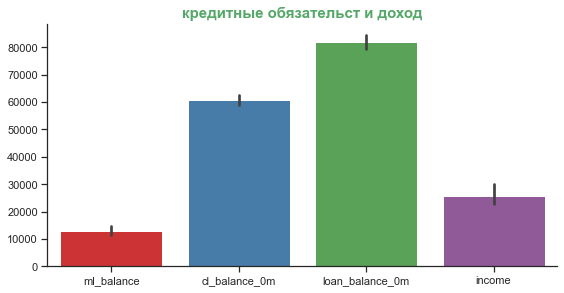

In [139]:
sns.catplot(
    data=df,
    kind='bar', 
    height=4, 
    aspect=2,   
    order=['ml_balance', 'cl_balance_0m', 'loan_balance_0m', 'income'],
    palette="Set1"
); 
plt.title('кредитные обязательст и доход', size=15, color='g', 
          weight='bold');

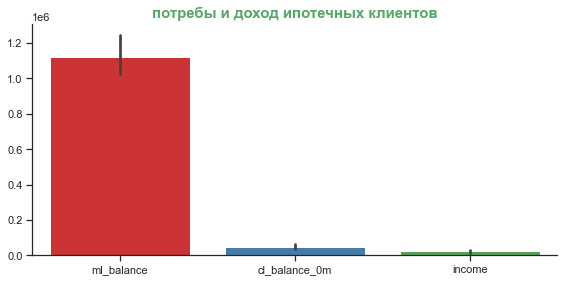

In [138]:
sns.catplot(
    data=df.query("ml_balance != 0.0"), 
    kind='bar', 
    height=4, 
    aspect=2,   
    order=['ml_balance', 'cl_balance_0m', 'income'],
    palette="Set1"
); 
plt.title('потребы и доход ипотечных клиентов', size=15, color='g', 
          weight='bold');

In [175]:
age_column = df["age"]

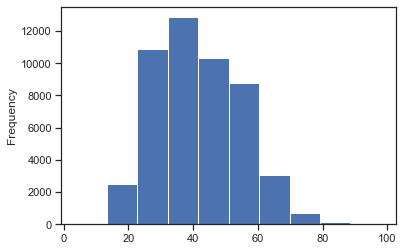

In [176]:
age_column.plot(kind="hist");

Вывод: основное число клиентов в возрасте от 22 до 60 лет, максимальное - 35-40 лет.

ниже можно посмотреть зависимость параметров выделенных из df:

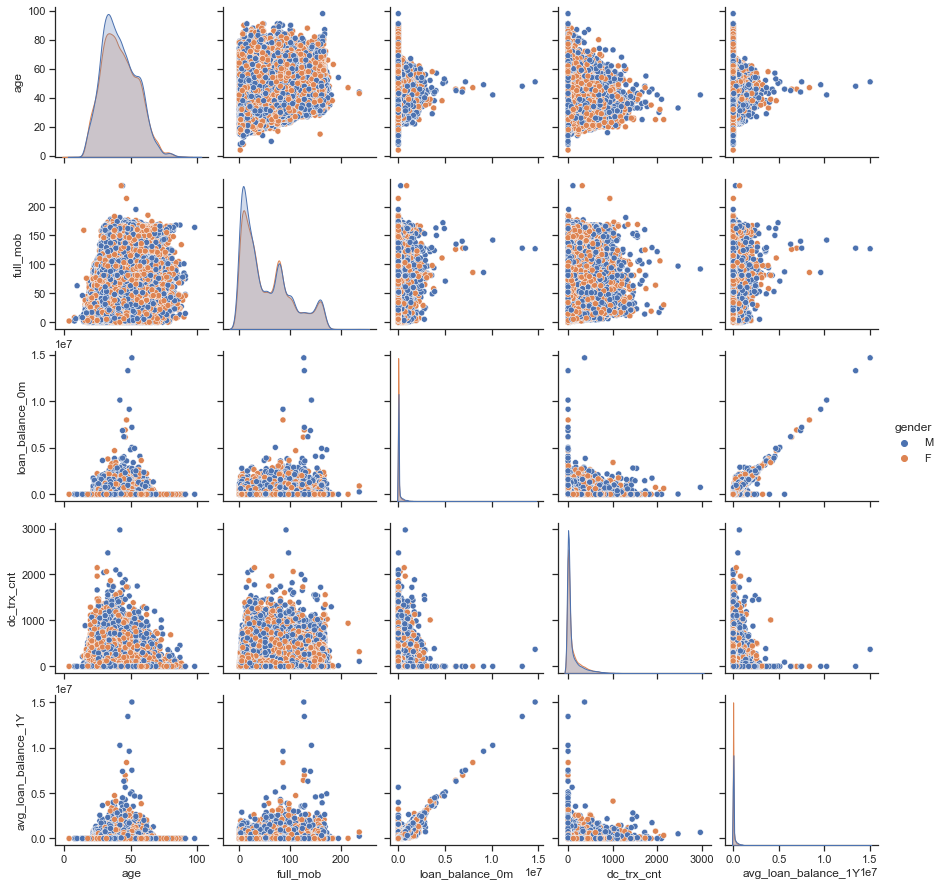

In [185]:
df_items = df.loc[:,['age', 'city_type', 'full_mob', 'loan_balance_0m','dc_trx_cnt','avg_loan_balance_1Y', 'gender']]
sns.pairplot(
    df_items,
    hue='gender'
)
plt.show();

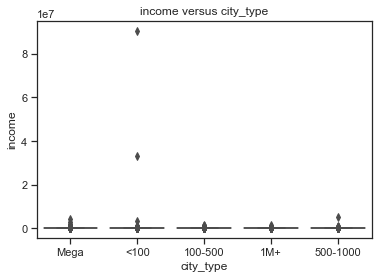

In [212]:
sns.boxplot(x='city_type', y = 'income', data=df)

plt.xlabel('city_type')
plt.ylabel('income')
plt.title('income versus city_type');

<AxesSubplot:>

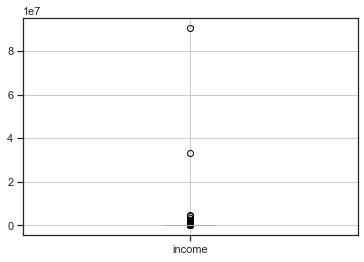

In [217]:
df.boxplot(column='income')

In [234]:
pd.crosstab(df['income'], df['city_type'], margins=True)

city_type,100-500,1M+,500-1000,<100,Mega,All
income,,,,,,
0.0,5397,4208,3211,7789,5796,26401
36.46,1,0,0,0,0,1
43.5,0,0,0,1,0,1
50.0,17,29,14,23,20,103
57.5,0,8,4,6,0,18
...,...,...,...,...,...,...
4107734.49,0,0,0,0,1,1
5000000.0,0,0,1,0,0,1
33063482.0,0,0,0,1,0,1


In [243]:
df_data = df.query("income < 2000000.0 and income != 0.0")

In [244]:
pd.crosstab(df_data['income'], df_data['city_type'], margins=True)

city_type,100-500,1M+,500-1000,<100,Mega,All
income,,,,,,
36.46,1,0,0,0,0,1
43.5,0,0,0,1,0,1
50.0,17,29,14,23,20,103
57.5,0,8,4,6,0,18
60.0,3,9,8,5,0,25
...,...,...,...,...,...,...
1294825.66,1,0,0,0,0,1
1326616.0,0,1,0,0,0,1
1371710.0,1,0,0,0,0,1


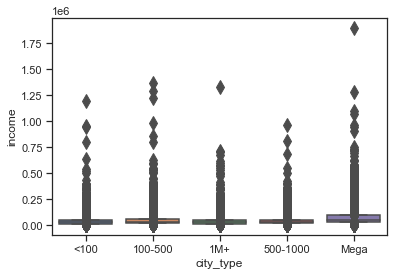

In [245]:
sns.boxplot(data=df_data, y='income', x='city_type', orient=None, saturation=0.75, width=0.8, dodge=True, fliersize=10, 
            linewidth=None, whis=0)
plt.show()

чтобы посмотреть медиану зарплты по городам в зависимости от численности населения необходимо сильно "чистить" df, т.к. очень сильные выбросы, нули:

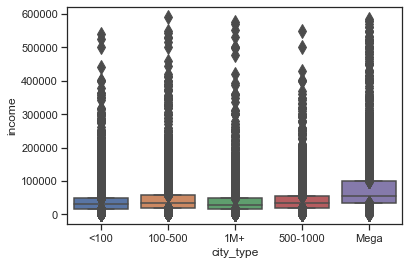

In [248]:
sns.boxplot(data=df_data.query("income<600000"), y='income', x='city_type', orient=None, saturation=0.75, width=0.8, dodge=True, fliersize=10, 
            linewidth=None, whis=0)
plt.show()

Очевидно, что медиана по зп в Mega-city значительно выше, чем в других. И вызывает удивление показатели 100-500, т.к. медиана выше, чем в 1M+ и выбросов по зп выше среднего тоже больше, чем в 500-1000 и чем в 1M+.

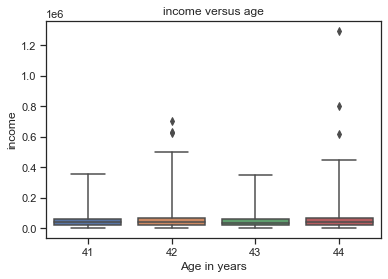

In [246]:
sns.boxplot(x='age', y='income', data=df_data.query("age < 45 and age>40"), whis=10)

plt.xlabel('Age in years')
plt.ylabel('income')
plt.title('income versus age');

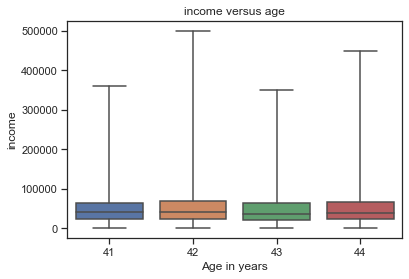

In [247]:
sns.boxplot(x='age', y='income', data=df_data.query("age < 45 and age>40").query("income<600000"), whis=10)

plt.xlabel('Age in years')
plt.ylabel('income')
plt.title('income versus age');

после "причёски" данных видим медиану по зп в зависимости от возраста, например с 41 по 44 год.

In [207]:
df_new = df.loc[:,['age', 'city_type', 'full_mob','dc_trx_cnt','avg_loan_balance_1Y', 'gender', 'dc_trx_cnt', 
                  'dc_trx_sum', 'income', 'avg_td_balance_1Y']]

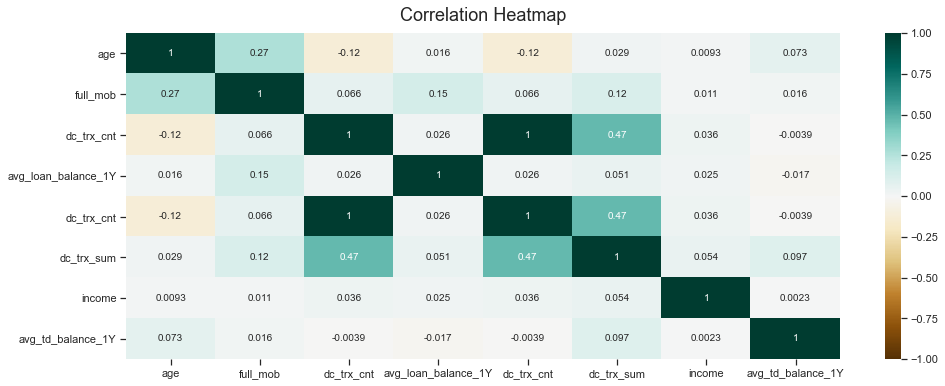

In [210]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_new.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12); 
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

Более сильная корреляция на обоих концах спектра проявляется в виде темных (насыщенных) ячеек, слабая – в виде светлых ячеек.
Вывод: сильной корреляции нет, относительно коррелируют количество трат по картам с суммами трат по картам и ещё слабее Длительность взаимоотношений с банком от возраста.